## Imports

In [1]:
from constants import TRAIN_CNN_FLUXES_PATH, \
                      TRAIN_CNN_AMP_PHASE_PATH, \
                      VALIDATION_CNN_FLUXES_PATH, \
                      VALIDATION_CNN_AMP_PHASE_PATH

from data_utils import load_numpy_data

from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction, \
                       plot_conv_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           create_convolutional_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model_with_generator, \
                           store_model

from configurations import SimpleConvolutional as ModelConfiguration

2023-12-18 09:36:05.469996: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 09:36:05.496065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 09:36:05.496086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 09:36:05.496752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 09:36:05.501362: I tensorflow/core/platform/cpu_feature_guar

## Load data

In the first place, define the data paths

In [2]:
validation_fluxes_array = load_numpy_data(VALIDATION_CNN_FLUXES_PATH)
validation_amp_phase_array = load_numpy_data(VALIDATION_CNN_AMP_PHASE_PATH)

## CONVOLUTIONAL MODEL

In [3]:
model_configuration = ModelConfiguration()
print(model_configuration.get_description())


	=== SimpleConvolutional ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Convolutional
		-Input shape: (55, 24, 1)
		-Output shape: (2, 96, 96)
		-Convolutional Layers: [1024, 512, 256, 1024]
		-Convolutonal Kernels: [(3, 1), (3, 1), (3, 1), (3, 1)]
		-Fully Connected Hidden layers: [1024, 2048, 2048, 2048]
		-Regularizer: None
		-Convolutional Activation: relu
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: True
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.0001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 200
		-Batch size: 32
		-Callbacks:
			-ReduceLROnPlateau: MSE 15 x0.1
			-Early Stop: MSE 50
	


2023-12-18 09:36:06.506096: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 09:36:06.528538: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 09:36:06.528667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
model = create_convolutional_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "SimpleConvolutional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 24, 1024)      4096      
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 12, 1024)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 12, 512)       1573376   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 6, 512)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 6, 256)        393472    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 6, 1024)

In [5]:
validation_fluxes_array.shape

(10000, 55, 24)

In [6]:
validation_amp_phase_array.shape

(10000, 2, 96, 96)

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
history = train_model_with_generator(
    model,
    TRAIN_CNN_FLUXES_PATH,
    TRAIN_CNN_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters()
)

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/modeling_utils.py:533: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/200


2023-12-18 09:36:08.140863: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-18 09:36:08.204640: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-18 09:36:08.462437: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-18 09:36:09.275296: I external/local_xla/xla/service/service.cc:168] XLA service 0x98cf600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-18 09:36:09.275311: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-12-18 09:36:09.279879: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1702852569.347746   10310 device_com

2188/2188 [==============================] - 120s 53ms/step - loss: 0.6340 - mean_squared_error: 0.6340 - val_loss: 0.6302 - val_mean_squared_error: 0.6302 - lr: 1.0000e-04
Epoch 2/200
2188/2188 [==============================] - 113s 52ms/step - loss: 0.6301 - mean_squared_error: 0.6301 - val_loss: 0.6266 - val_mean_squared_error: 0.6266 - lr: 1.0000e-04
Epoch 3/200
2188/2188 [==============================] - 113s 52ms/step - loss: 0.6285 - mean_squared_error: 0.6285 - val_loss: 0.6262 - val_mean_squared_error: 0.6262 - lr: 1.0000e-04
Epoch 4/200
2188/2188 [==============================] - 112s 51ms/step - loss: 0.6277 - mean_squared_error: 0.6277 - val_loss: 0.6253 - val_mean_squared_error: 0.6253 - lr: 1.0000e-04
Epoch 5/200
2188/2188 [==============================] - 179s 82ms/step - loss: 0.6272 - mean_squared_error: 0.6272 - val_loss: 0.6252 - val_mean_squared_error: 0.6252 - lr: 1.0000e-04
Epoch 6/200
2188/2188 [==============================] - 1014s 463ms/step - loss: 0.626

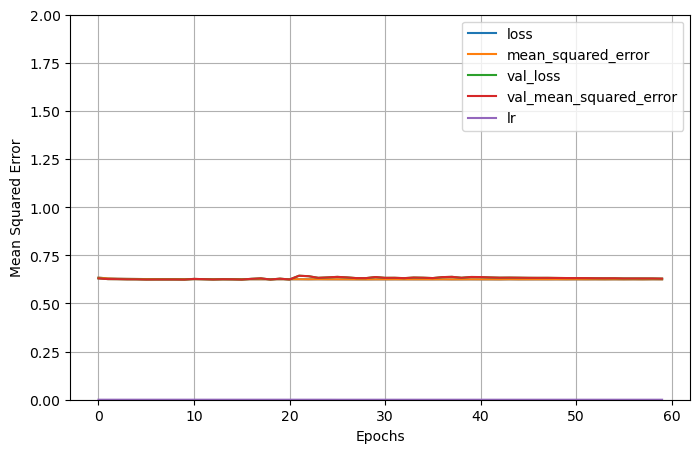

In [9]:
plot_model_history(history)

In [10]:
n = 106
plot_conv_amp_phase_prediction(
    model,
    val_fluxes_array[n],
    val_amp_phase_array[n][0],
    val_amp_phase_array[n][1]
    )

NameError: name 'val_fluxes_array' is not defined

In [ ]:
n = 106
plot_conv_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n][0],
    train_amp_phase_array[n][1]
    )

In [ ]:
store_model(model,
            model.name,
            model_configuration.get_description())